In [1]:
%load_ext autoreload
%autoreload 2

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

import model as md
import view as vw

In [2]:
duration = 100e-6
F_main_real=440e3
fs=F_main_real*20

t = np.linspace(0, duration, int(duration * fs))  
U = np.sin(2 * np.pi * F_main_real * t)

In [3]:
R= 50
C= 475e-12
t,I= md.RC_transfer(t,U,R,C)

In [4]:
F,V = md.get_spectrum3(t,U)

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

T_counts=md.convert_to_counts(t,T)

phase_real=md.get_phase_RC_real(F_peak_calc, R,C)
phase_real_graph= np.full(len(t), phase_real)

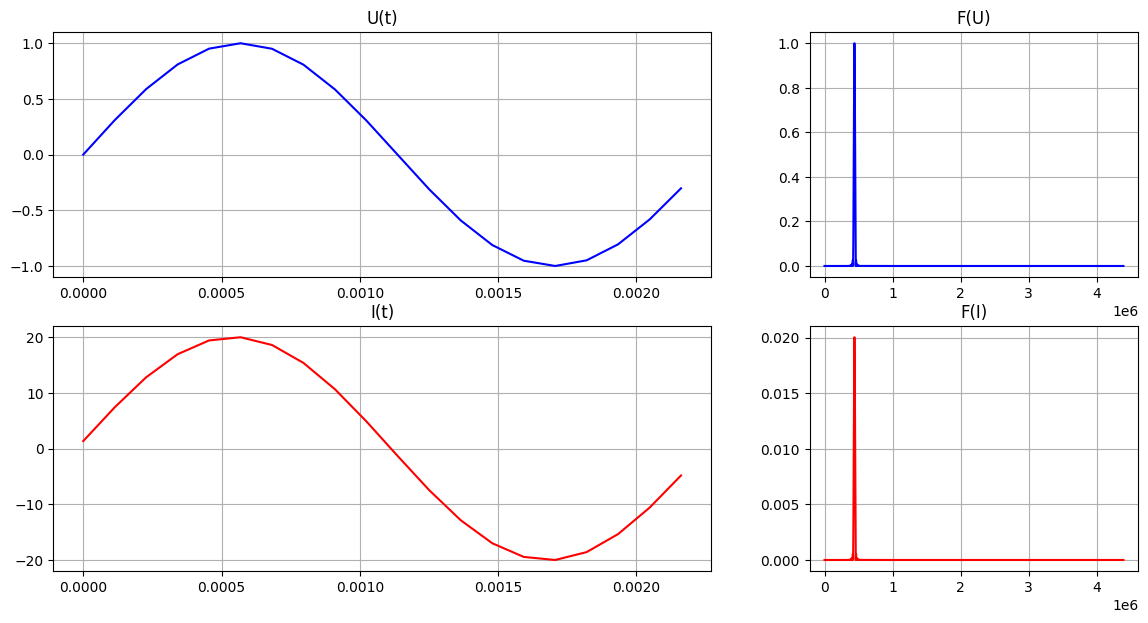

In [5]:
vw.show_I_U_2(t,I,U,0,T_counts)

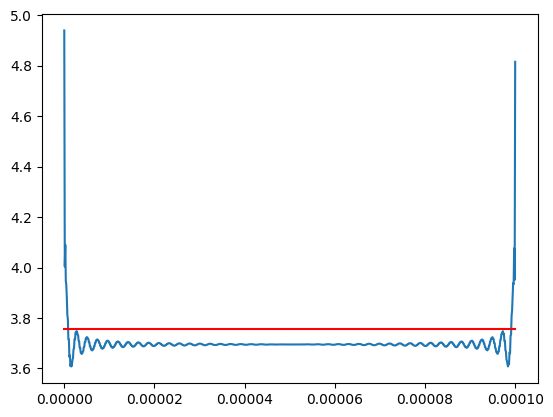

In [7]:
time_hilbert, phase_hilbert=md.get_phase_hilbert(t, U, I)

plt.plot(time_hilbert, phase_hilbert)
plt.plot(t,phase_real_graph,"red")

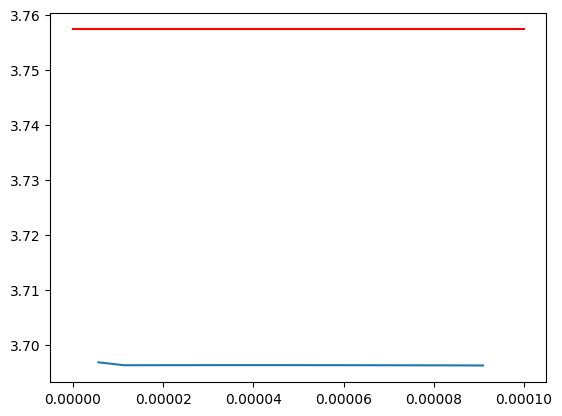

In [9]:
times, phase_diff = md.get_phase_FFT(t, U, I, F_main_real, n_periods=5, overlap=0.5)

plt.plot(times, phase_diff)
plt.plot(t,phase_real_graph,"red")

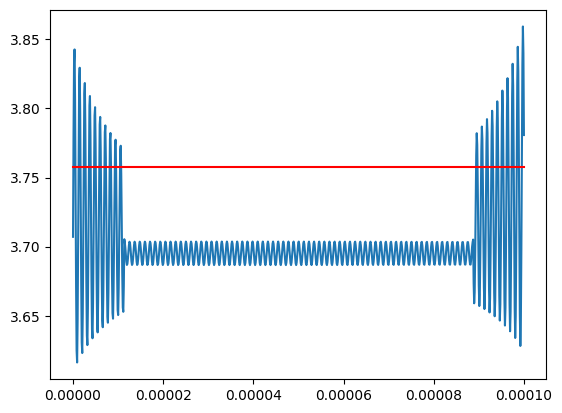

In [10]:
time_lockin, phase_lockin=md.get_phase_lockin(t, U, I,440e3)

plt.plot(time_lockin, phase_lockin)
plt.plot(t,phase_real_graph,"red")